In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# **-----------------------------------------Punto 1---------------------------------------------**

# **Importar y escalar - train y test**

In [ ]:
data_diabetes = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes = pd.read_csv(data_diabetes)
diabetes.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
scaler = MinMaxScaler()
new_diabetes = scaler.fit_transform(diabetes[diabetes.columns])
new_diabetes = pd.DataFrame(new_diabetes,columns = diabetes.columns)

In [ ]:
new_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [ ]:
X = new_diabetes.iloc[:,:8]
y = new_diabetes.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Modelo hecho por mi - resultados**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, m, h):
  J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
  return J

def update_thetas(theta, alpha, m, h, X, y):
  w = theta - (alpha / m) * (X.T.dot(h - y))
  return w

def gradient_descent(X, y, alpha, num_iters):

    m = len(y)
    theta = np.zeros(X.shape[1])
    costs = np.zeros(num_iters)
    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = update_thetas(theta, alpha, m, h, X, y)
        costs[i] = cost_function(y, m, h)
    return theta, costs

def predict(X, theta):

    X = np.array(X)
    theta = np.array(theta)

    z = np.dot(X, theta)
    y_pred = sigmoid(z)


    for i in range(len(y_pred)):
      if y_pred[i]>=0.5:
        y_pred[i]=1
      else:
        y_pred[i]=0
    return y_pred


def accuracy(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    accuracy = np.mean(y_true == y_pred)
    return accuracy


In [ ]:
alpha = 0.1
num_iters = 100

theta, costs = gradient_descent(X_train, y_train , alpha, num_iters)

print('Coeficientes del modelo:', theta)
print('Historial de la función de costCostos por iteracion:', costs)

Coeficientes del modelo: Pregnancies                 0.003529
Glucose                    -0.117640
BloodPressure              -0.374220
SkinThickness              -0.117212
Insulin                     0.015547
BMI                        -0.206656
DiabetesPedigreeFunction   -0.029411
Age                         0.097749
dtype: float64
Historial de la función de costCostos por iteracion: [0.69314718 0.69185947 0.6906387  0.68948115 0.68838329 0.68734179
 0.68635349 0.68541542 0.68452477 0.6836789  0.68287529 0.68211159
 0.68138556 0.68069509 0.68003821 0.67941303 0.67881778 0.67825079
 0.6777105  0.6771954  0.6767041  0.67623528 0.67578768 0.67536013
 0.67495152 0.67456079 0.67418695 0.67382908 0.67348629 0.67315774
 0.67284267 0.67254031 0.67224998 0.67197101 0.67170278 0.67144471
 0.67119623 0.67095684 0.67072602 0.67050332 0.67028829 0.67008051
 0.66987961 0.6696852  0.66949693 0.66931448 0.66913752 0.66896578
 0.66879896 0.6686368  0.66847907 0.66832551 0.66817592 0.66803007
 0.66788

In [ ]:
y_predict_train = predict(X_train,theta)
y_predict_test = predict(X_test,theta)

accuracy_train = accuracy(y_train, y_predict_train)
accuracy_test = accuracy(y_test, y_predict_test)

print("Accuracy train: ",accuracy_train)
print("Accuracy test: ",accuracy_test)

Accuracy train:  0.6499068901303539
Accuracy test:  0.6536796536796536


# **Modelos SGDClassifier y LogisticRegression**


In [ ]:
sgd_clf = SGDClassifier(loss='log_loss', max_iter=100, random_state=42,verbose=1)
sgd_clf.fit(X_train, y_train)

-- Epoch 1
Norm: 30.49, NNZs: 8, Bias: -31.769878, T: 537, Avg. loss: 2.917813
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.69, NNZs: 8, Bias: -33.255727, T: 1074, Avg. loss: 1.738049
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 33.59, NNZs: 8, Bias: -26.010712, T: 1611, Avg. loss: 1.457393
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 29.42, NNZs: 8, Bias: -25.604236, T: 2148, Avg. loss: 1.133797
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 25.60, NNZs: 8, Bias: -21.364536, T: 2685, Avg. loss: 1.127095
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 23.42, NNZs: 8, Bias: -18.388245, T: 3222, Avg. loss: 0.968345
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 20.14, NNZs: 8, Bias: -16.532864, T: 3759, Avg. loss: 0.959554
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 19.01, NNZs: 8, Bias: -14.908980, T: 4296, Avg. loss: 0.776901
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 17.39, NNZs: 8, Bias: -13.086474, T: 4833, Avg. loss: 0.756960
T

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, verbose=1)

In [ ]:
train_accuracy_sgd = sgd_clf.score(X_train, y_train)
test_accuracy_sgd = sgd_clf.score(X_test, y_test)

print("Accuracy train SGD: ",train_accuracy_sgd)
print("Accuracy test SGD: ",test_accuracy_sgd)

Accuracy train SGD:  0.770949720670391
Accuracy test SGD:  0.7186147186147186


In [ ]:
log_reg = LogisticRegression(max_iter=100, random_state=42,verbose=1)
log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(random_state=42, verbose=1)

In [ ]:
train_accuracy_lr = log_reg.score(X_train, y_train)
test_accuracy_lr = log_reg.score(X_test, y_test)

print("Accuracy train SGD: ",train_accuracy_lr)
print("Accuracy test SGD: ",test_accuracy_lr)

Accuracy train SGD:  0.7653631284916201
Accuracy test SGD:  0.7445887445887446


# **Conclusion**

*  SDGClassifier y LogisticREgression fueron peor metrica a comparaciòn del
acurracy, tuvieron un valor alto, ESto ocurrrio en tambien en el modelo hecho a mano. ENtonces si toca elegir a alguno de ellos, eligiria al LogisticREgression , ya que su train y test presentan un mejor promedio.

*  EL costo de SGDClassifier bajaba con cada iteracion que hacia. Y el modelo hecho a mano tenia un costo mas constante

# **Dibujote**

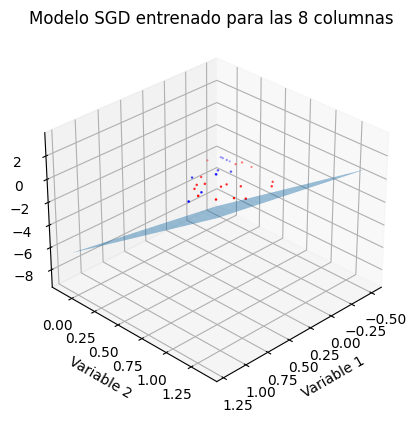

In [ ]:
X = X.iloc[0:30,0:3]
y = y.iloc[0:30]
w = sgd_clf.coef_[0][0:3]
b =sgd_clf.intercept_[0]

x1_min, x1_max = X[X.columns[0]].min() - 0.5, X[X.columns[0]].max() + 0.5
x2_min, x2_max = X[X.columns[1]].min() - 0.5, X[X.columns[1]].max() + 0.5

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

xx3 = (-w[0] * xx1 - w[1] * xx2 - b) / w[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


colors = ['r' if i == 1 else 'b' for i in y]

plt.scatter(X[X.columns[0]], X[X.columns[1]], X[X.columns[2]],c=colors)

ax.plot_surface(xx1, xx2, xx3, alpha=0.5)

ax.set_xlabel('Variable:1')
ax.set_ylabel('Variable: 2')
ax.set_zlabel('Variable: 3')
ax.view_init(elev=30, azim=45)
plt.title('Modelo SGD entrenado para 8 columnas')

plt.show()


# **-----------------------------------------Punto 2---------------------------------------------**

# **Importar y escalar**

In [ ]:
house_train_url = "https://raw.githubusercontent.com/seb03990/Parcial1_ML/main/california_housing_train.csv"
house_test_url = "https://raw.githubusercontent.com/seb03990/Parcial1_ML/main/california_housing_test.csv"
house_train = pd.read_csv(house_train_url)
house_test = pd.read_csv(house_test_url)

In [ ]:
house_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
house_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
y_train = house_train.iloc[:,-1]
y_test= house_test.iloc[:,-1]

house_train = house_train.iloc[:,0:8]
house_test = house_test.iloc[:,0:8]

In [ ]:
new_house_train = scaler.fit_transform(house_train[house_train.columns])
new_house_train = pd.DataFrame(new_house_train,columns = house_train.columns)

In [ ]:
new_house_test = scaler.fit_transform(house_test[house_test.columns])
new_house_test = pd.DataFrame(new_house_test,columns = house_test.columns)

In [ ]:
house_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
new_house_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281


In [ ]:
y_train

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

# **Modelo hecho por mi y resultados de su implementacion**

In [ ]:
def costo(X, y, beta):
    n = len(y)
    y_pred = X.dot(beta)
    error = y_pred - y
    costo = 1/(2*n) * np.sum(error**2)
    return costo

def gradiente_lineal(n, X, error):
  g = 1/n * X.T.dot(error)
  return g

def predecir(X, beta):
    y_pred = X.dot(beta)
    return y_pred

def reg_lineal(X, y, alpha, n_iter):

    n = len(y)
    beta = np.zeros(X.shape[1])
    costo_historico = np.zeros(n_iter)

    for i in range(n_iter):
        y_pred = predecir(X, beta)
        error = y_pred - y
        gradiente = gradiente_lineal(n, X, error)
        beta = beta - alpha * gradiente
        costo_historico[i] = costo(X, y, beta)

    return beta, costo_historico

In [ ]:
alpha = 0.1
n_iter = 100

betas, costos = reg_lineal(new_house_train, y_train, alpha, n_iter)

print('Pesos: ',betas)
print('Costos: ', costos)

Pesos:  longitude             127540.453335
latitude               76055.817750
housing_median_age    134284.745214
total_rooms            32104.722825
total_bedrooms         32389.551898
population             12650.995800
households             32585.436921
median_income         165256.540962
dtype: float64
Costos:  [2.51909816e+10 2.25896662e+10 2.03498957e+10 1.84211607e+10
 1.67600096e+10 1.53290623e+10 1.40961617e+10 1.30336443e+10
 1.21177118e+10 1.13278913e+10 1.06465706e+10 1.00585982e+10
 9.55093994e+09 9.11238282e+09 8.73328054e+09 8.40533466e+09
 8.12140625e+09 7.87535383e+09 7.66189403e+09 7.47648167e+09
 7.31520662e+09 7.17470505e+09 7.05208311e+09 6.94485126e+09
 6.85086774e+09 6.76829004e+09 6.69553301e+09 6.63123297e+09
 6.57421671e+09 6.52347491e+09 6.47813921e+09 6.43746254e+09
 6.40080217e+09 6.36760511e+09 6.33739559e+09 6.30976428e+09
 6.28435896e+09 6.26087660e+09 6.23905644e+09 6.21867411e+09
 6.19953656e+09 6.18147762e+09 6.16435432e+09 6.14804360e+09
 6.132439

In [ ]:

predictions_train = predecir(new_house_train, betas)
predictions_test = predecir(new_house_test, betas)

mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

print("MSE train del modelo de Regresión Lineal Manual:", mse_train)
print("MSE test del modelo de Regresión Lineal Manual:", mse_test)

MSE train del modelo de Regresión Lineal Manual: 11094752359.5077
MSE test del modelo de Regresión Lineal Manual: 10750151565.565817


# **Modelos SGDRegressor y LinearRegression**

In [ ]:
sgdr = SGDRegressor(alpha=0.1, max_iter=100, verbose=1)
sgdr.fit(new_house_train,y_train)

-- Epoch 1
Norm: 95554.96, NNZs: 8, Bias: 169077.811024, T: 17000, Avg. loss: 6019665063.883227
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 99156.16, NNZs: 8, Bias: 184251.125874, T: 34000, Avg. loss: 5701922476.427844
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 98252.70, NNZs: 8, Bias: 185206.908550, T: 51000, Avg. loss: 5674685939.479054
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 98078.83, NNZs: 8, Bias: 187051.798223, T: 68000, Avg. loss: 5671224230.204429
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 98212.31, NNZs: 8, Bias: 188984.952306, T: 85000, Avg. loss: 5670666260.584204
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 97884.22, NNZs: 8, Bias: 188543.763788, T: 102000, Avg. loss: 5672333956.751612
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 98217.86, NNZs: 8, Bias: 189750.815146, T: 119000, Avg. loss: 5675766239.107772
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 98200.78, NNZs: 8, Bias: 189350.629131, T: 136000, Avg. loss: 56

SGDRegressor(alpha=0.1, max_iter=100, verbose=1)

In [ ]:

sgdr_predictions_train = sgdr.predict(new_house_train)
sgdr_predictions_test = sgdr.predict(new_house_test)


sgd_mse_train = mean_squared_error(y_train, sgdr_predictions_train)
sgd_mse_test = mean_squared_error(y_test, sgdr_predictions_test)

print("MSE train del modelo de Regresión Lineal de SGD:", sgd_mse_train)
print("MSE test del modelo de Regresión Lineal de SGD:", sgd_mse_test)

MSE train del modelo de Regresión Lineal de SGD: 11364176076.175056
MSE test del modelo de Regresión Lineal de SGD: 10852252525.408562


In [ ]:
reg = LinearRegression()
reg.fit(new_house_train, y_train)

LinearRegression()

In [ ]:

lr_predictions_train = reg.predict(new_house_train)
lr_predictions_test = reg.predict(new_house_test)


lr_mse_train = mean_squared_error(y_train, lr_predictions_train)
lr_mse_test = mean_squared_error(y_test, lr_predictions_test)

print("MSE train del modelo de Regresión Lineal de LR:", lr_mse_train)
print("MSE test del modelo de Regresión Lineal de LR:", lr_mse_test)

MSE train del modelo de Regresión Lineal de LR: 4824523173.926897
MSE test del modelo de Regresión Lineal de LR: 19064861768.935722


# **Conclusion**

*  Las metricas y los costos de este modelo daban muy altos, esto se debe a que el dataset trabajado tenia rango de valores demaciado amplia, desde uno pequeño hasta uno muy alto, lo que hace que predecir algo de este Dataset sea muy dificil

# **Dibujote**

In [ ]:
X_train = new_house_train.iloc[:,0:2]
X_test = new_house_test.iloc[:,0:2]

lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

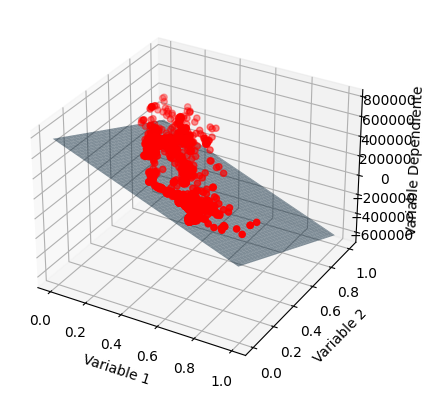

In [ ]:
w = lr2.coef_
b = lr2.intercept_


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = X_test.iloc[:, 0]
x2 = X_test.iloc[:, 1]
y = y_test[0]


ax.scatter(x1, x2, y, color = 'r')

x1, x2 = np.meshgrid(np.arange(x1.min(), x1.max(), 0.01),
                               np.arange(x2.min(), x2.max(), 0.01))
z = b + w[0]*x1 + w[1]*x2

ax.plot_surface(x1, x2, z, alpha=0.5)

ax.set_xlabel('Variable: 1')
ax.set_ylabel('Variable: 2')
ax.set_zlabel('Variable: Dependiente')

plt.show()